In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Conv1D, Flatten
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
file_path = "Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Check missing values
print(df.isnull().sum())  # 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Drop irrelevant columns
columns_to_drop = ["Cabin", "Name", "Ticket", "PassengerId"]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Fill missing age with median
age_imputer = SimpleImputer(strategy="median")
df["Age"] = age_imputer.fit_transform(df[["Age"]])

In [4]:
# Fill missing embarked with most frequent value
if df["Embarked"].isnull().sum() > 0:
    df["Embarked"].fillna({"Embarked":df["Embarked"].mode()[0]}, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])  # male=1, female=0
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])  # C, Q, S to numeric values

C:\Users\satya\AppData\Local\Temp\ipykernel_7420\2871037352.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna({"Embarked":df["Embarked"].mode()[0]}, inplace=True)


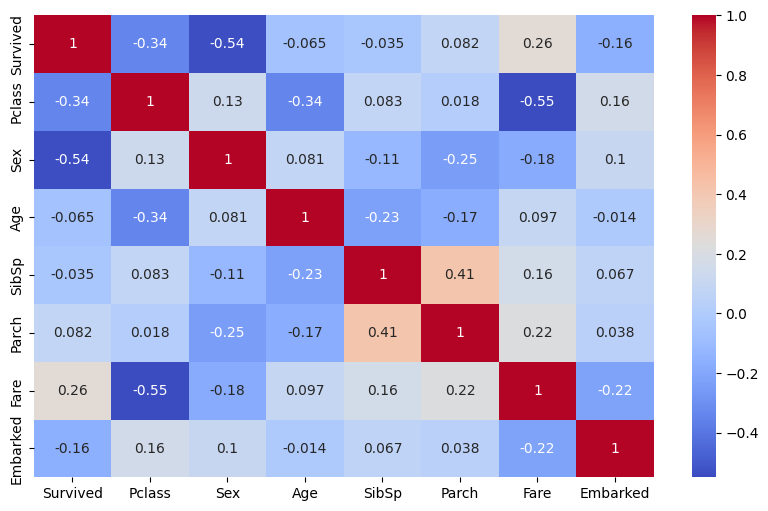

['Sex', 'Pclass', 'Fare', 'Embarked', 'Parch']


In [5]:
# Step 2: Correlation Analysis
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Step 3: Feature Selection (Top 5 correlated features with 'Survived')
top_features = corr_matrix["Survived"].abs().sort_values(ascending=False)[1:6].index.tolist()
print(top_features)

In [6]:
X = df[top_features]
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Neural Network Model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Step 6: Model Training
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 7: Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6424 - loss: 0.7872 - val_accuracy: 0.6082 - val_loss: 0.6228
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7317 - loss: 0.9002 - val_accuracy: 0.5858 - val_loss: 0.6532
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7357 - loss: 0.7335 - val_accuracy: 0.5858 - val_loss: 0.6320
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7522 - loss: 0.5771 - val_accuracy: 0.5858 - val_loss: 0.6129
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7548 - loss: 0.6379 - val_accuracy: 0.5858 - val_loss: 0.6081
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7548 - loss: 0.5781 - val_accuracy: 0.5858 - val_loss: 0.6239
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7666 - loss: 0.5209 - val_accuracy: 0.5858 - val_loss: 0.6265
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7621 - loss: 0.5229 - val_accuracy: 0.

In [8]:
# Save the model
model.save("titanic_survival_model.h5")